## Homework 3 - Part 1
## Decision Tree and Random forest

In this homework, you will perform classification on the provided datasets using Decision Tree and Random Forest algorithms. 

The first dataset you will be working with contains 2 features. The second dataset contains 50 features. Both of them have a target label which can be 0 or 1.

You will go step by step with the first dataset. <br>
1 - Use a Decision Tree Classifier and observe the model performance.<br>
2 - Use a Random Forest Classifier and observe the model performance.<br>
3 - Use Grid Search to choose the optimal values for hyperparameters and observe the performance of the best model.


For the second dataset, you are required to generate an optimized Random Forest model using what you have learned in the steps mentioned above.

Dataset 1:
train_2features.csv and test_2features.csv are the training set and testing set respecitvely.


Dataset 2:
train_50features.csv and test_50features.csv are the training set and testing set respecitvely.


To obtain a deterministic behavior, keep the random_state in all algorithms fixed to the value given. 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import visualize_2d_data

# Dataset 1

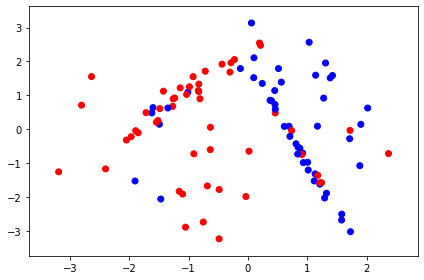

In [2]:
train_df = pd.read_csv("train_2features.csv")
f, ax = visualize_2d_data(train_df)

In [3]:
train_df.head()

,x1,x2,y
0,0.455178,0.727672,1
1,-0.303342,1.684185,0
2,-1.100127,-1.914980,0
3,1.129869,-1.319774,1
4,0.396403,0.836826,1


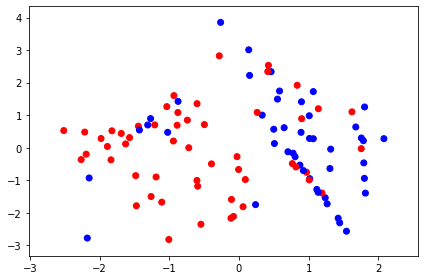

In [4]:
test_df = pd.read_csv("test_2features.csv")
f, ax = visualize_2d_data(test_df)

In [5]:
test_df.head()

,x1,x2,y
0,-1.260875,-1.496315,0
1,1.804029,1.253803,1
2,-1.627030,0.118947,0
3,-1.888437,0.040332,0
4,1.140222,1.199631,0


Q. From the above visualizations, what can you tell about the need for a linear/non-linear model for classification?

### Decision Tree
From sklearn.tree use DecisionTreeClassifier to build a classification model with default parameters.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score

In [7]:
X_train, y_train = train_df.drop('y', axis=1), np.ravel(train_df['y'])
X_test, y_test = test_df.drop('y', axis=1), np.ravel(test_df['y'])

In [8]:
### Fit the classifier on the training data
clf = DecisionTreeClassifier(random_state=26)

clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=26, splitter='best')

In [9]:
### Make predictions on the training data
y_hat_train = clf.predict(X_train)

### WRITE CODE HERE ###

Q. Print accuracy, prediction and recall for the predictions made on the training data. 

In [10]:
from sklearn.metrics import precision_score, accuracy_score, recall_score

def fetch_scores(y: pd.DataFrame, y_hat: pd.DataFrame):
    """
    Function to calculate the precision, accuracy and recall scores
    """
    print("Accuracy Score: ", accuracy_score(y, y_hat))
    print("Precision Score: ", precision_score(y, y_hat))
    print("Recall Score: ", recall_score(y, y_hat))    

fetch_scores(y_train, y_hat_train)

Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0


In [11]:
### Make predictions on the testing data
y_hat_test = clf.predict(X_test)


Q. Print accuracy, prediction and recall for the predictions made on the testing data. 

In [12]:
# Fetch the accuracy, prediction and recall scores
fetch_scores(y_test, y_hat_test)

Accuracy Score:  0.69
Precision Score:  0.6818181818181818
Recall Score:  0.6382978723404256


In [13]:
# Counting the number of outputs to identify their distribution
print(sum(1 for i in y_train if i == 1) / len(y_train))
print(sum(1 for i in y_test if i == 1) / len(y_test))

0.49
0.47


Q. Plot ROC curve and obtain AUC for test predictions

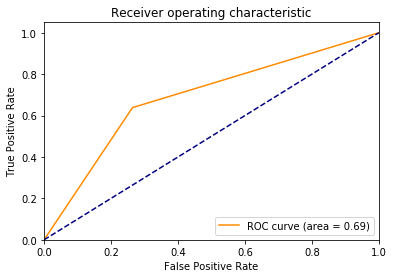

In [14]:
from sklearn.metrics import roc_curve, auc
# Plot the ROC curve by giving appropriate names for title and axes. 

%matplotlib inline

def plot_roc_curve(y: pd.DataFrame, y_hat: pd.DataFrame, title="Receiver operating characteristic"):
    """
    Function to plot the roc curve
    """
    fpr, tpr, thresholds = roc_curve(y, y_hat)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (area = {auc(fpr, tpr):>.2f})")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

y_hat_prob = clf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_hat_prob)

Q. Based on the scores for training set and test set, explain the performance of the above model in terms of bias and variance.

### Random Forest


Decision Trees have low predictive power compared to other methods due to high variance. Random Forest increases prediction power at the expense of decreased interpretability. 


From sklearn.ensemble use RandomForestClassifier to build a classification model with default parameters.

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
### Fit the classifier on the training data
clf = RandomForestClassifier(random_state=26)

clf.fit(X_train, y_train)

C:\Users\patri\Anaconda3\envs\tf_env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=26, verbose=0,
                       warm_start=False)

In [17]:
### Make predictions on the training data
y_hat_train = clf.predict(X_train)

Q. Print accuracy, prediction and recall for the predictions made on the training data. 

In [18]:
fetch_scores(y_train, y_hat_train)

Accuracy Score:  0.99
Precision Score:  1.0
Recall Score:  0.9795918367346939


In [19]:
### Make predictions on the testing data
y_hat_test = clf.predict(X_test)

Q. Print accuracy, prediction and recall for the predictions made on the testing data. 

In [20]:
fetch_scores(y_test, y_hat_test)

Accuracy Score:  0.72
Precision Score:  0.7021276595744681
Recall Score:  0.7021276595744681


Q. Plot ROC curve and obtain AUC for the test predictions

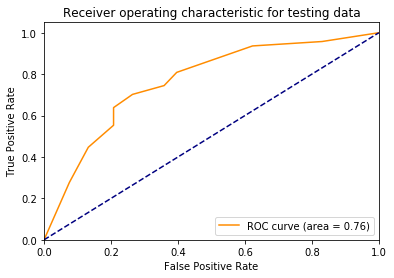

In [21]:
# Plot the ROC curve by giving appropriate names for title and axes. 
y_hat_prob = clf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_hat_prob, "Receiver operating characteristic for testing data")

Q. Based on the scores for training set and test set, explain the performance of the above model in terms of bias and variance. Is the Random Forest model better or worse than the Decision Tree model? Explain why you think the performance may have improved or deteriorated. 

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data. This is separate from "fitting" or "training" the model. The fitting/training procedure is governed by the amount and quality of your training data, as the fitting algorithm is unique to each classifier (e.g. logistic regression or random forest). 

However, there are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

A quick and efficient way to optimize hyperparameters is to perform Grid Search over different values of the parameters. 


In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
# In the below dictionary, fill in the list of values that you want to try out for each parameter
# Refer to the descriptions in sklearn's doc to understand what the parameters depict

param_grid = {
    'max_depth': [i for i in range(1, 10, 3)],
    'max_features': ['sqrt'], # Since we only have 2 features at max for the training data
    'min_samples_leaf': [i for i in range(2, 10, 2)],
    'min_samples_split': [i for i in range(2, 15, 2)],
    'n_estimators': [i for i in range(5, 30, 5)]
}

In [24]:
rf = RandomForestClassifier(random_state=26)

In [25]:
grid_search = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [26]:
### Fit the training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 420 candidates, totalling 1260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 606 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 1172 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed:   15.4s finished
C:\Users\patri\Anaconda3\envs\tf_env\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=26,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'ma

Q. Display the parameters of the best model.

In [27]:
### WRITE CODE HERE ###
grid_search.best_params_

{'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 10}

Accuracy Score:  0.8
Precision Score:  0.7647058823529411
Recall Score:  0.8297872340425532


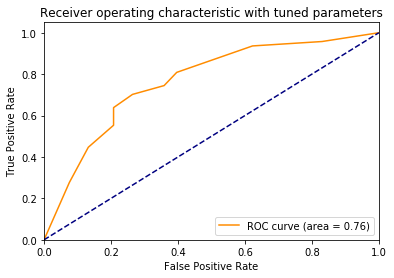

In [28]:
### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.
### Make predictions on the testing set and display accuracy, precision and recall. Plot ROC curve and print AUC.

# Initializing the classifier with the tuned parameters
rf = RandomForestClassifier(random_state=26, **grid_search.best_params_)
# Fit the model with the data
rf.fit(X_train, y_train)
# Predict the values
y_hat_test = rf.predict(X_test)

# Fetch the precision, accuracy and recall scores for the testing data
fetch_scores(y_test, y_hat_test)

# Plotting the values on a ROC curve
y_hat_prob = clf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_hat_prob, "Receiver operating characteristic with tuned parameters")

Q. How did performing Grid Search impact the performance of the model? Were you able to optimize the hyperparameters?

# Dataset 2

Given this procedure, you are to optimize a random forest classifier for a dataset with 50 features. Training data are provided, but testing data does not include the labels. It is up to you to use the training data to optimize generalization performance to the test data. You will submit a csv file with your predictions. It should contain one column and the column should be named "y".


In [29]:
train_df = pd.read_csv("train_50features.csv")
test_data = pd.read_csv("test_50features.csv")

In [30]:
##########################################
### Construct your final random forest model and optimize the hyperparameters using Grid Search ###

# Data Preprocessing and preparation
X_train, y_train = train_df.drop('y', axis=1), np.ravel(train_df['y'])

# Selecting parameters for identifying the most optimal hyperparameters
param_grid = {
    'max_depth': [i for i in range(1, 15, 3)],
    'max_features': ['sqrt'] + list(range(1, len(X_train.columns), 5)),
    'min_samples_leaf': [i for i in range(2, 10, 2)],
    'min_samples_split': [i for i in range(5, 50, 5)],
    'n_estimators': [i for i in range(10, 50, 10)]
}

rf = RandomForestClassifier(random_state=26)

grid_search = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

rf = RandomForestClassifier(random_state=26, **grid_search.best_params_)
rf.fit(X_train, y_train)

predicted_df = pd.DataFrame({'y': rf.predict(test_data)})
predicted_df.to_csv("predictions.csv", index=False)


Fitting 3 folds for each of 7920 candidates, totalling 23760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 1292 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 2424 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 3884 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 5664 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 7772 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 10200 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 12956 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 16032 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 19436 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 23160 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 23760 out of 23760 | elapsed:  3.4min finished


{'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 40, 'n_estimators': 20}


C:\Users\patri\Anaconda3\envs\tf_env\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
